<div style="font-size:18pt; padding-top:20px; text-align:center">СЕМИНАР 1. <b>Онлайн обучение и </b> <span style="font-weight:bold; color:green">Vowpal Wabbit</span></div><hr>
<div style="text-align:right;">Папулин С.Ю. <span style="font-style: italic;font-weight: bold;">(papulin_hse@mail.ru)</span></div>

<a name="0"></a>
<div><span style="font-size:14pt; font-weight:bold">Содержание</span>
    <ol>
        <li><a href="#1">VW и sklearn</a></li>
        <li><a href="#2">Преобразование данных в формат VW</a></li>
        <li><a href="#3">VW и python</a></li>
        <li><a href="#4">VW и командная строка</a>
        <li><a href="#5">Задача CTR</a>
        <li><a href="#6">Источники</a>
        </li>
    </ol>
</div>

<p>Подключение стилей оформления</p>

In [5]:
%%html
<link href="css/style.css" rel="stylesheet" type="text/css">

<p><b>Подключение основных модулей</b></p>

In [1]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn import linear_model

In [3]:
from sklearn.datasets import make_classification
from matplotlib.colors import ListedColormap
clrMap = ListedColormap(["blue", "red", "green"])

<a name="1"></a>
<div style="display:table; width:100%; padding-top:10px; padding-bottom:10px; border-bottom:1px solid lightgrey">
    <div style="display:table-row">
        <div style="display:table-cell; width:80%; font-size:14pt; font-weight:bold">1. VW и sklearn</div>
    	<div style="display:table-cell; width:20%; text-align:center; background-color:whitesmoke; border:1px solid lightgrey"><a href="#0">К содержанию</a></div>
    </div>
</div>

In [4]:
from vowpalwabbit.sklearn_vw import VWClassifier

<p><b>Исходные данные</b></p>

In [5]:
n = 5000
x, y_0 = make_classification(n_samples=n, n_features=2, n_redundant=0, 
                           n_informative=2, n_clusters_per_class=1, n_classes=2, class_sep=0.5,
                           random_state=100)

In [6]:
func_y_conv = np.vectorize(lambda x: -1 if x==0 else 1)

In [7]:
y = func_y_conv(y_0)
y

array([-1,  1, -1, ..., -1,  1,  1])

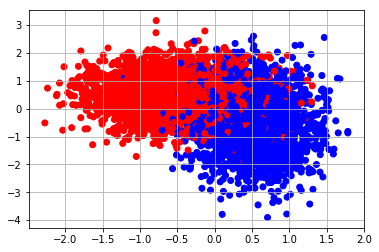

In [8]:
clrMap = ListedColormap(["blue", "red"])
plt.scatter(x[:,0], x[:,1], c=y, cmap=clrMap)
plt.grid(True)
plt.show()

<p><b>Формирование обучающего и тестового подмножеств</b></p>

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=12)

<p><b>Обучение</b></p>

<p><i>Sklearn</i></p>

In [11]:
m_lr = linear_model.LogisticRegression(penalty="l2", fit_intercept=True, max_iter=100, C=1e5, 
                                         solver="lbfgs", random_state=12345)
m_lr.fit(x_train, y_train)

LogisticRegression(C=100000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=12345,
          solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)

In [12]:
m_lr.coef_, m_lr.intercept_

(array([[-4.08533775,  1.24534277]]), array([ 0.16049617]))

In [13]:
score = m_lr.score(x_train, y_train)
score

0.87885714285714289

<p><i>Vowpal Wabbit</i></p>

In [14]:
m_vw_lr = VWClassifier(quiet=True, loss_function="logistic", bfgs=False, l2=0.00001)#, mem=15,  passes=100

In [15]:
#m_vw_lr.classes_=np.array([0.,  1.])

In [16]:
passes = 10

for i in range(passes):
    m_vw_lr.fit(x_train, y_train)

In [17]:
m_vw_lr.get_coefs().toarray()

array([[-4.70394993,  1.42256761,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [18]:
m_vw_lr.get_coefs(), m_vw_lr.get_intercept()

(<1x262144 sparse matrix of type '<class 'numpy.float64'>'
 	with 3 stored elements in Compressed Sparse Row format>, 0.20989301800727844)

In [19]:
m_vw_lr.score(x_train, y_train)

0.87942857142857145

<p><b>Проверка на тестовом подмножестве</b></p>

<p><i>Sklearn</i></p>

In [20]:
score = m_lr.score(x_test, y_test)
score

0.8666666666666667

<p><i>Vowpal Wabbit</i></p>

In [21]:
m_vw_lr.score(x_test, y_test)

0.8666666666666667

In [22]:
m_vw_lr.get_params(deep=True)

{'bfgs': False,
 'convert_to_vw': True,
 'l2': 1e-05,
 'loss_function': 'logistic',
 'passes': 1,
 'quiet': True}

<p><b>Графики</b></p>

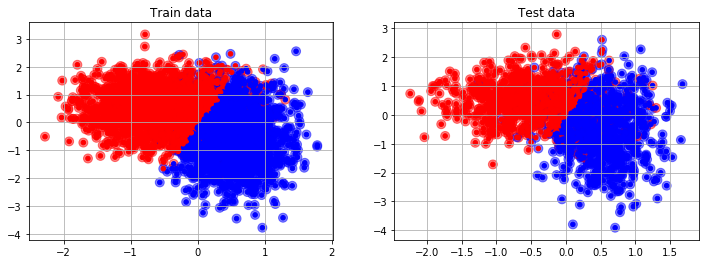

In [23]:
plt.figure(1, figsize=[12, 4])

plt.subplot(1,2,1)
plt.title("Train data")
plt.scatter(x_train[:,0], x_train[:,1], c=y_train, s=80, cmap=clrMap, alpha=0.5)
plt.scatter(x_train[:, 0], x_train[:, 1], c=m_vw_lr.predict(x_train), s=20, cmap=clrMap)
plt.grid(True)

plt.subplot(1,2,2)
plt.title("Test data")
plt.scatter(x_test[:,0], x_test[:,1], c=y_test, s=80, cmap=clrMap, alpha=0.5)
plt.scatter(x_test[:, 0], x_test[:, 1], c=m_vw_lr.predict(x_test), s=20, cmap=clrMap)
plt.grid(True)

plt.show()

<a name="2"></a>
<div style="display:table; width:100%; padding-top:10px; padding-bottom:10px; border-bottom:1px solid lightgrey">
    <div style="display:table-row">
        <div style="display:table-cell; width:80%; font-size:14pt; font-weight:bold">2. Преобразование данных в формат VW</div>
    	<div style="display:table-cell; width:20%; text-align:center; background-color:whitesmoke; border:1px solid lightgrey"><a href="#0">К содержанию</a></div>
    </div>
</div>

In [1]:
# cd /YOUR_PATH/Class_1/lib

<p>Путь к исходным данным</p>

In [ ]:
/YOUR_PATH/Class_1/data/simple_example/cl_data_train.csv
/YOUR_PATH/Class_1/data/simple_example/cl_data_test.csv

<p>Преобразование</p>

In [26]:
%%bash
python2 csv2vw.py ../data/simple_example/cl_data_train.csv ../data/simple_example/cl_data_train.vw 2 1
python2 csv2vw.py ../data/simple_example/cl_data_test.csv ../data/simple_example/cl_data_test.vw 2 1

<a href="https://github.com/zygmuntz/phraug">https://github.com/zygmuntz/phraug</a>

<p>Типы столбцов</p>

|Variable type|How to encode|readable example|
|-------------|-------------|----------------|
|boolean|only encode the true case|is_alive|
|categorical|append value to name|color=green
|ordinal+monotonic|:approx_value|education:2
|numeric|:actual_value|height:1.85

<a href="http://stackoverflow.com/questions/28640837/vowpal-wabbit-how-to-represent-categorical-features">http://stackoverflow.com/questions/28640837/vowpal-wabbit-how-to-represent-categorical-features</a>

<a name="3"></a>
<div style="display:table; width:100%; padding-top:10px; padding-bottom:10px; border-bottom:1px solid lightgrey">
    <div style="display:table-row">
        <div style="display:table-cell; width:80%; font-size:14pt; font-weight:bold">3. VW и python</div>
    	<div style="display:table-cell; width:20%; text-align:center; background-color:whitesmoke; border:1px solid lightgrey"><a href="#0">К содержанию</a></div>
    </div>
</div>

In [2]:
# cd /YOUR_PATH/Class_1/data/simple_example/

In [29]:
from vowpalwabbit import pyvw

In [30]:
vw = pyvw.vw("--binary", quiet=True)

In [31]:
ex = None
with open("cl_data_train.vw") as f:
    for line in f:
        ex = vw.example(line)
        vw.learn(ex)
        print(vw.predict(ex))

-1.0
1.0
1.0
1.0
1.0
-1.0
-1.0
-1.0
1.0
-1.0
1.0
1.0
-1.0
1.0
-1.0
1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
1.0
1.0
1.0
1.0
-1.0
1.0
-1.0
1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
1.0
1.0
1.0
1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
1.0
1.0
-1.0
-1.0
1.0
-1.0
1.0
1.0
1.0
1.0
1.0
-1.0
1.0
-1.0
1.0
1.0
1.0
1.0
-1.0
1.0
-1.0
-1.0
1.0
-1.0
-1.0
1.0
1.0
-1.0
-1.0
1.0
1.0
-1.0
1.0
-1.0
1.0
1.0
-1.0
-1.0
1.0
1.0
-1.0
-1.0
-1.0
-1.0
1.0
1.0
-1.0
1.0
1.0
-1.0
-1.0
1.0
1.0
1.0
1.0
-1.0
-1.0
1.0
1.0
1.0
-1.0
-1.0
1.0
-1.0
-1.0
1.0
-1.0
-1.0
1.0
1.0
-1.0
1.0
-1.0
1.0
1.0
1.0
1.0
-1.0
-1.0
1.0
1.0
-1.0
-1.0
-1.0
1.0
-1.0
-1.0
1.0
1.0
-1.0
-1.0
1.0
1.0
-1.0
-1.0
1.0
1.0
-1.0
1.0
-1.0
1.0
1.0
-1.0
-1.0
-1.0
1.0
1.0
1.0
-1.0
1.0
-1.0
-1.0
1.0
1.0
1.0
-1.0
1.0
1.0
1.0
-1.0
1.0
-1.0
-1.0
1.0
-1.0
-1.0
1.0
1.0
1.0
1.0
1.0
-1.0
1.0
-1.0
1.0
1.0
-1.0
-1.0
1.0
1.0
1.0
-1.0
-1.0
-1.0
-1.0
1.0
-1.0
-1.0
1.0
1.0
-1.0
1.0
1.0
1.0
-1.0
-1.0
-1.0
-1.0
1.0
1.0
1.0
1.0
-1.0
-1.0
-1.0
1.0
-1.0
1.0
-1.0
1.0
-1.0
-1.0
-1.0
1

In [32]:
with open("cl_data_test.vw") as f:
    for line in f:
        true_val = line.split("|")[0].strip()
        ex = vw.example(line)
        pred_val = vw.predict(ex)
        print("true: %s, pred: %f" % (true_val, pred_val))

true: 1, pred: 1.000000
true: 1, pred: 1.000000
true: 1, pred: 1.000000
true: -1, pred: -1.000000
true: -1, pred: -1.000000
true: 1, pred: 1.000000
true: 1, pred: -1.000000
true: 1, pred: -1.000000
true: -1, pred: -1.000000
true: -1, pred: -1.000000
true: -1, pred: 1.000000
true: 1, pred: 1.000000
true: 1, pred: 1.000000
true: 1, pred: 1.000000
true: 1, pred: 1.000000
true: 1, pred: 1.000000
true: 1, pred: -1.000000
true: -1, pred: -1.000000
true: 1, pred: 1.000000
true: -1, pred: -1.000000
true: -1, pred: -1.000000
true: 1, pred: 1.000000
true: -1, pred: -1.000000
true: 1, pred: 1.000000
true: -1, pred: -1.000000
true: -1, pred: -1.000000
true: -1, pred: -1.000000
true: -1, pred: -1.000000
true: -1, pred: 1.000000
true: -1, pred: 1.000000
true: 1, pred: 1.000000
true: -1, pred: -1.000000
true: -1, pred: -1.000000
true: -1, pred: -1.000000
true: 1, pred: 1.000000
true: -1, pred: 1.000000
true: 1, pred: -1.000000
true: 1, pred: 1.000000
true: -1, pred: 1.000000
true: 1, pred: 1.000000
t

<a name="4"></a>
<div style="display:table; width:100%; padding-top:10px; padding-bottom:10px; border-bottom:1px solid lightgrey">
    <div style="display:table-row">
        <div style="display:table-cell; width:80%; font-size:14pt; font-weight:bold">4. VW и командная строка</div>
    	<div style="display:table-cell; width:20%; text-align:center; background-color:whitesmoke; border:1px solid lightgrey"><a href="#0">К содержанию</a></div>
    </div>
</div>

<p><b>Установка Vowpal Wabbit</b></p>

In [ ]:
%%bash
sudo apt install vowpal-wabbit

In [ ]:
#vw --data "cl_data.wv" -c --passes 1 --loss_function logistic --binary 

In [ ]:
#cd /YOUR_PATH/Class_1/data/simple_example/

<p><b>Обучение модели</b></p>

In [33]:
%%bash
vw --data "cl_data_train.vw" -c --passes 3 --binary -f "model.vw" -p train_pred.txt

final_regressor = model.vw
predictions = train_pred.txt
Num weight bits = 18
learning rate = 0.5
initial_t = 0
power_t = 0.5
decay_learning_rate = 1
using cache_file = cl_data_train.vw.cache
ignoring text input in favor of cache input
num sources = 1
average  since         example        example  current  current  current
loss     last          counter         weight    label  predict features
0.000000 0.000000            1            1.0  -1.0000  -1.0000        3
0.000000 0.000000            2            2.0   1.0000   1.0000        3
0.000000 0.000000            4            4.0   1.0000   1.0000        3
0.000000 0.000000            8            8.0  -1.0000  -1.0000        3
0.125000 0.250000           16           16.0  -1.0000  -1.0000        3
0.156250 0.187500           32           32.0  -1.0000  -1.0000        3
0.125000 0.093750           64           64.0  -1.0000  -1.0000        3
0.109375 0.093750          128          128.0  -1.0000   1.0000        3
0.128906 0.148438  

<p><b>Тестирование модели</b></p>

In [34]:
%%bash
vw --data "cl_data_test.vw" -t -i "model.vw" --binary -p "test_predict.txt"

only testing
predictions = test_predict.txt
Num weight bits = 18
learning rate = 0.5
initial_t = 0
power_t = 0.5
using no cache
Reading datafile = cl_data_test.vw
num sources = 1
average  since         example        example  current  current  current
loss     last          counter         weight    label  predict features
0.000000 0.000000            1            1.0   1.0000   1.0000        3
0.000000 0.000000            2            2.0   1.0000   1.0000        3
0.000000 0.000000            4            4.0  -1.0000  -1.0000        3
0.250000 0.500000            8            8.0   1.0000  -1.0000        3
0.187500 0.125000           16           16.0   1.0000   1.0000        3
0.187500 0.187500           32           32.0  -1.0000  -1.0000        3
0.171875 0.156250           64           64.0   1.0000   1.0000        3
0.125000 0.078125          128          128.0  -1.0000   1.0000        3
0.105469 0.085938          256          256.0  -1.0000   1.0000        3
0.126953 0.148438 

<a name="5"></a>
<div style="display:table; width:100%; padding-top:10px; padding-bottom:10px; border-bottom:1px solid lightgrey">
    <div style="display:table-row">
        <div style="display:table-cell; width:80%; font-size:14pt; font-weight:bold">5. Задача CTR</div>
    	<div style="display:table-cell; width:20%; text-align:center; background-color:whitesmoke; border:1px solid lightgrey"><a href="#0">К содержанию</a></div>
    </div>
</div>

<p>Исходные данные и задание</p>

<a href="https://www.kaggle.com/c/avazu-ctr-prediction/data">https://www.kaggle.com/c/avazu-ctr-prediction/data</a>

<div class="msg-block msg-warning">
  <p class="msg-text-warn">Далее рассматривается мини-набор данных из <span class="code-font">../data/ctr/*</span>. Полный набор данных необходимо предварительно скачать по ссылке выше</p>
</div>

In [ ]:
# cd /YOUR_PATH/Class_1/data/ctr/

<p>Признаки исходных данных</p>

In [ ]:
id: ad identifier
click: 0/1 for non-click/click
hour: format is YYMMDDHH, so 14091123 means 23:00 on Sept. 11, 2014 UTC.
C1 -- anonymized categorical variable
banner_pos
site_id
site_domain
site_category
app_id
app_domain
app_category
device_id
device_ip
device_model
device_type
device_conn_type
C14-C21 -- anonymized categorical variables

<p>Функция для преобразования исходный данных в формат для VW</p>

In [37]:
def convert2vw(file_path, output_file, skip_first_line=True):
    
    num_features = dict()
    
    for el in range(21):
        num_features[el] = set()
    
    with open(file_path) as read_f, open(output_file, "w") as write_f:
        if skip_first_line == True:
            read_f.readline()
        for line in read_f:
            lineVW = ""
            arrLine = line.strip().split(",")
            
            catLine = ""
            for indx, el in enumerate(arrLine[3:]):
                catLine += " " + el
                num_features[indx].add(el)
            if arrLine[1] == "0":
                arrLine[1] = "-1"
            lineVW =  arrLine[1] + " '" + arrLine[0] + " |time " + arrLine[2] + " |cat" + catLine
           
            #print(lineVW)
            write_f.write(lineVW + "\n")
    
    feature_count = list()
    
    for key in num_features:
        feature_count.append(len(num_features[key]))
    
    return feature_count

<p>Преобразование для мини-набора (аналогично для полного)</p>

In [38]:
file_path = "/YOUR_PATH/Class_1_CTR/data/ctr/mini_train.csv"
output_file_path = "/YOUR_PATH/Class_1_CTR/data/ctr/main_train.vw"
convert2vw(file_path=file_path, output_file=output_file_path)

[3, 2, 76, 68, 9, 51, 12, 7, 63, 472, 222, 4, 3, 85, 3, 3, 55, 4, 22, 48, 19]

In [39]:
file_path = "/YOUR_PATH/Class_1_CTR/data/ctr/mini_test.csv"
output_file_path = "/YOUR_PATH/Class_1_CTR/data/ctr/mini_test.vw"
convert2vw(file_path=file_path, output_file=output_file_path)

[3, 2, 56, 51, 8, 43, 10, 6, 49, 343, 174, 4, 3, 73, 3, 3, 47, 4, 20, 45, 18]

In [3]:
# cd /YOUR_PATH/Class_1_CTR/data/ctr/

<p><b>Проверка на мини-dataset</b></p>

In [43]:
%%bash
vw --data mini_train.vw -f model.vw --loss_function logistic --link logistic -c --passes 1

final_regressor = model.vw
Num weight bits = 18
learning rate = 0.5
initial_t = 0
power_t = 0.5
using cache_file = mini_train.vw.cache
ignoring text input in favor of cache input
num sources = 1
average  since         example        example  current  current  current
loss     last          counter         weight    label  predict features
0.693147 0.693147            1            1.0  -1.0000   0.5000       23
0.927951 1.162754            2            2.0   1.0000   0.3126       23
0.679250 0.430549            4            4.0  -1.0000   0.2333       23
0.420009 0.160769            8            8.0  -1.0000   0.0710       23
0.567242 0.714475           16           16.0  -1.0000   0.1676       23
0.531694 0.496145           32           32.0  -1.0000   0.1565       23
0.418781 0.305868           64           64.0  -1.0000   0.1535       23
0.401291 0.383802          128          128.0  -1.0000   0.1704       23
0.415514 0.429737          256          256.0  -1.0000   0.2042       23
0.

<p><b>Тестирование модели</b></p>

In [44]:
%%bash
vw --data "mini_test.vw" -t -i model.vw --loss_function logistic -p "test_predict_prob.txt"

only testing
predictions = test_predict_prob.txt
Num weight bits = 18
learning rate = 0.5
initial_t = 0
power_t = 0.5
using no cache
Reading datafile = mini_test.vw
num sources = 1
average  since         example        example  current  current  current
loss     last          counter         weight    label  predict features
0.203145 0.203145            1            1.0  -1.0000   0.1838       23
0.252877 0.302609            2            2.0  -1.0000   0.2611       23
0.167389 0.081900            4            4.0  -1.0000   0.0604       23
0.139124 0.110860            8            8.0   1.0000   0.8461       23
0.163865 0.188605           16           16.0  -1.0000   0.0959       23
0.166747 0.169629           32           32.0  -1.0000   0.1364       23
0.203584 0.240422           64           64.0  -1.0000   0.1155       23
0.231684 0.259784          128          128.0   1.0000   0.8747       23
0.250812 0.269940          256          256.0  -1.0000   0.0726       23
0.258135 0.26545

<a name="6"></a>
<div style="display:table; width:100%; padding-top:10px; padding-bottom:10px; border-bottom:1px solid lightgrey">
    <div style="display:table-row">
        <div style="display:table-cell; width:80%; font-size:14pt; font-weight:bold">6. Источники</div>
    	<div style="display:table-cell; width:20%; text-align:center; background-color:whitesmoke; border:1px solid lightgrey"><a href="#0">К содержанию</a></div>
    </div>
</div>

In [ ]:
https://github.com/zygmuntz/phraug
https://mlwave.com/predicting-click-through-rates-with-online-machine-learning/
https://www.kaggle.com/c/avazu-ctr-prediction
https://github.com/guestwalk/kaggle-avazu
https://github.com/JohnLangford/vowpal_wabbit/wiki/Command-line-arguments
https://github.com/JohnLangford/vowpal_wabbit/wiki/Input-format
https://pypi.python.org/pypi/vowpalwabbit
https://github.com/JohnLangford/vowpal_wabbit/wiki/Loss-functions
http://stackoverflow.com/questions/28640837/vowpal-wabbit-how-to-represent-categorical-features